In [1]:
#Quantum Programming Homework 3
#Nathan Taylor
#03/09/22

In [38]:
import cirq
import matplotlib.pyplot as plt
import numpy as np
from cirq.contrib.svg import SVGCircuit, circuit_to_svg
import timeit

Hubbard Model for Solids to the Gate Model
$$
H=-J\sum_{j=0}^8(\sigma^+_j\sigma^-_{j+1}+\sigma^-_j\sigma^+_{j+1})+V\sigma^z_3\\ 
e^{-i Hdt} = \prod_{j=0}^8 e^{-iJdt(\sigma^+_j\sigma^-_{j+1}+\sigma^-_j\sigma^+_{j+1})}e^{-iV\sigma^z_3}=\prod_{j=0}^8 e^{-i\frac{J}{2}dt (X_jX_{j+1}+Y_jY_{j+1})}e^{-iV\sigma^z_3}=\prod_{j\neq k} \text{iSWAP}(-2dt)_{jk}\text{R}_3^z(dtV)
$$

In [3]:
#1b Hubbard Model for 1D chain - simulating solids
#1D implies no J-W tails from the transformation

def HubbardModel(t, dt):
    L=8#qubits
    J=1
    V=1
    steps = int(t/dt)
    theta=-2*J*dt/np.pi#divide by pi because cirq multiplies it by pi for some reason
    oplist = []
    qubits = cirq.LineQubit.range(L)

    #Initial State
    oplist.append(cirq.X(qubits[0]))

    #Simulate Evolution
    for j in range(steps):
        for i in range(int(L/2)):#2 layers of partial iswaps
            oplist.append(cirq.ISwapPowGate(exponent=theta)(qubits[2*i],qubits[2*i+1]))
        for i in range(int(L/2)-1):
            oplist.append(cirq.ISwapPowGate(exponent=theta)(qubits[1+2*i],qubits[2*i+2]))
        oplist.append(cirq.rz(-dt*V)(qubits[3]))#1 impurity potential

    #Measure
    oplist.append(cirq.measure(*qubits, key='z'))
    return oplist

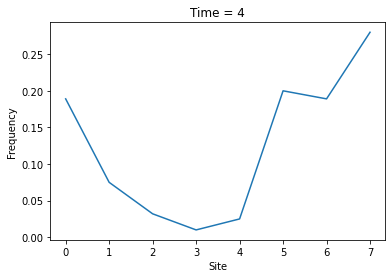

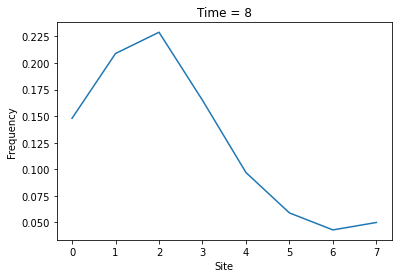

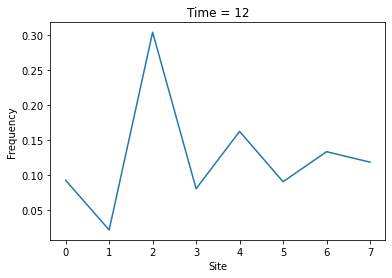

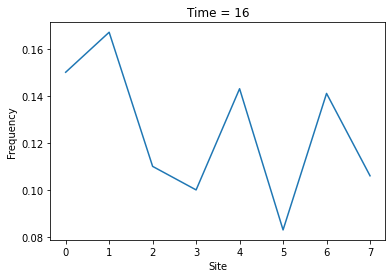

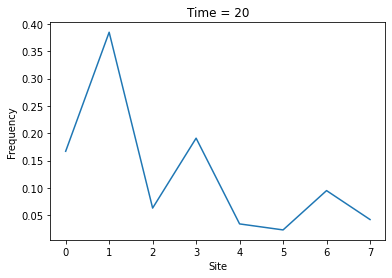

In [51]:
#Simulate using gate model - asymptotic precision

sim = cirq.Simulator()
counts = 1000 #Quantum measurement randomness
dt = 0.01 #Approximation error

for t in range(4,24,4):
    circuit = cirq.Circuit(HubbardModel(t, dt))
    sample = sim.run(circuit,repetitions=counts)
    data = sample.histogram(key='z')

    frequency = np.zeros(8)
    for key, value in data.items():
        site = int(np.log(key)/np.log(2))
        frequency[7-site] = int(value)
        
    frequency/=np.sum(frequency)#normalize
        
    plt.figure(t)
    plt.xlabel("Site")
    plt.ylabel("Frequency")
    plt.title("Time = "+str(t))
    plt.plot(frequency)

Run Time:  0


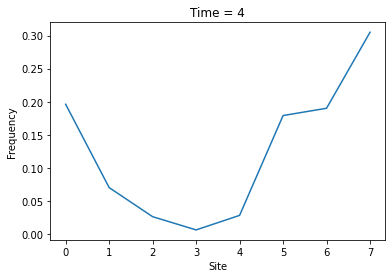

In [52]:
#Simulate using gate model
#What is the biggest step size that still gives a good approximation
#T=4: dt=0.04
#T=8: dt=0.003
#T=12: dt=0.005
#T=16: dt=0.0006
#T=20: dt = 0.0004

t=4 #evolution time
dt = 0.04 #Approximation error
counts = 1000 #Quantum measurement randomness

sim = cirq.Simulator()
circuit = cirq.Circuit(HubbardModel(t, dt))

#Time the simulation out of curiosity and boredom
start_time = timeit.default_timer()
sample = sim.run(circuit,repetitions=counts)#Simulate
elapsed = timeit.default_timer() - start_time
print("Run Time: ", int(elapsed))

data = sample.histogram(key='z')
frequency = np.zeros(8)
for key, value in data.items():
    site = int(np.log(key)/np.log(2))
    frequency[7-site] = int(value)

frequency/=np.sum(frequency)#normalize
    
plt.figure(t)
plt.xlabel("Site")
plt.ylabel("Frequency")
plt.title("Time = "+str(t))
plt.plot(frequency)

The largest step size for each evolution time with no noticeable approximation error:

| Evolution Time | dt |
| :------: | :------: |
| 4      | 0.04       |
| 8   | 0.003        |
| 12   | 0.005        |
| 16   | 0.0006        |
| 20   | 0.0004        |